In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

import cv2
from google.colab.patches import cv2_imshow

import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

In [ ]:
from google.colab import files

uploaded_file = files.upload()
input_file_name = list(uploaded_file.keys())[0]

Saving 1.mp4 to 1.mp4


In [ ]:
input_mp4 = open(input_file_name,'rb').read()
input_video_url = "data:video/mp4;base64," + b64encode(input_mp4).decode()
HTML("""
    <video width=500 controls autoplay loop>
          <source src="{video_url}" type="video/mp4">
    </video>
    """.format(video_url=input_video_url)
)

In [ ]:
input_video = cv2.VideoCapture(input_file_name)
print(input_video.get(2))
print(input_video.get(3)) # height
print(input_video.get(4)) # width
print(input_video.get(5)) # frame rate
print(input_video.get(6))
print(input_video.get(7)) # total frames
input_video.release()

3.3333333333333335e-05
1280.0
720.0
29.97002997002997
828601953.0
106.0


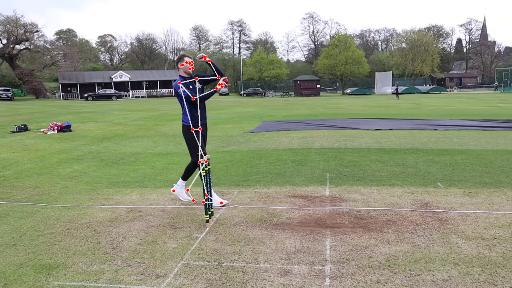

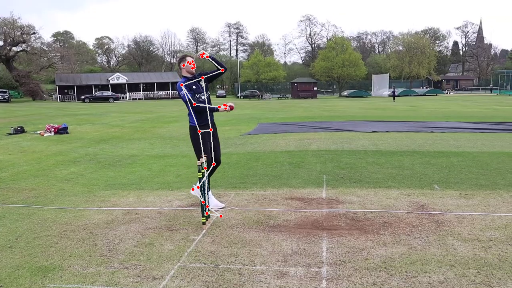

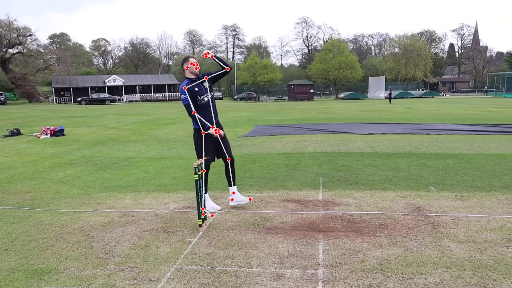

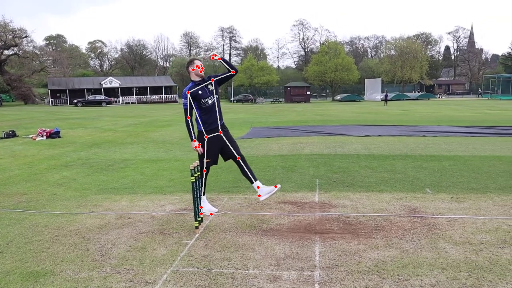

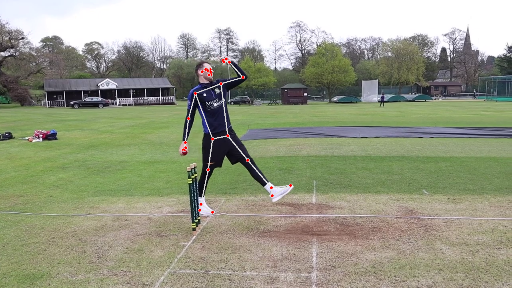

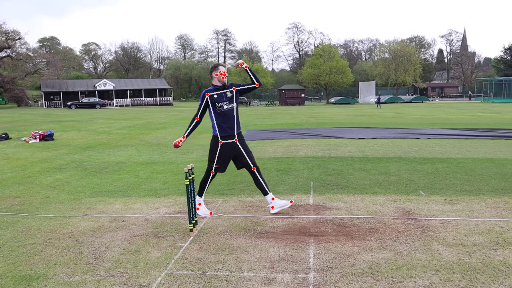

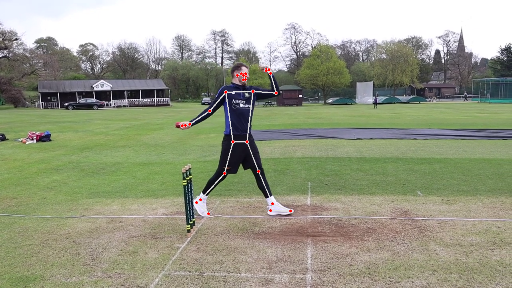

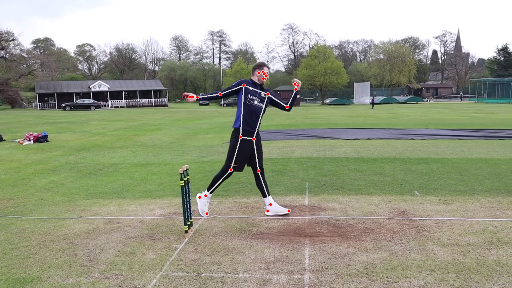

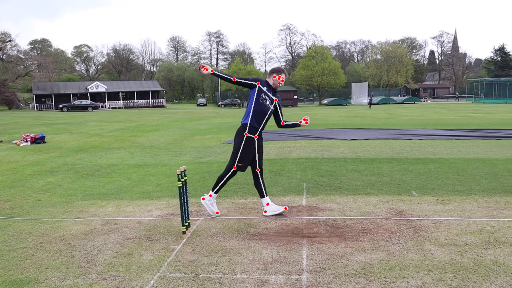

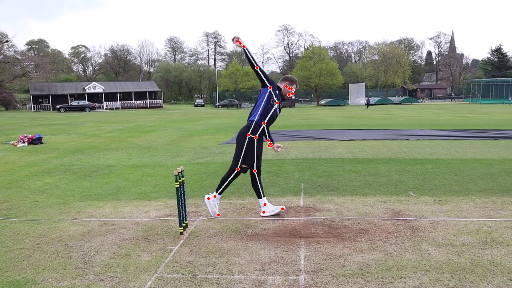

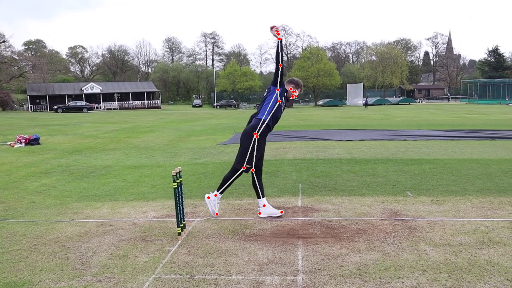

frames processed =>  106


In [ ]:
input_video = cv2.VideoCapture(input_file_name)
output_file_name = 'output_' + input_file_name

frame_width = int(input_video.get(3))
frame_height = int(input_video.get(4))
frame_rate = int(input_video.get(5))
size = (frame_width, frame_height)

image_scale_factor = 0.4
image_display_size = (int(frame_width * image_scale_factor), int(frame_height * image_scale_factor))


output_video = cv2.VideoWriter(output_file_name, cv2.VideoWriter_fourcc(*'MP4V'), frame_rate, size)

frame=0
with mp_pose.Pose(static_image_mode=False, min_detection_confidence = 0.7, min_tracking_confidence = 0.7) as pose:
	while input_video.isOpened():
		success, image = input_video.read()
		if not success:
			print("frames processed => ", frame)
			break
		
		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
		image.flags.writeable = False
		results = pose.process(image)
		
		image.flags.writeable = True
		image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
		mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
		output_video.write(image)
		if frame % 10 == 0:
			# cv2_imshow(image)
			image_resize = cv2.resize(image, image_display_size)
			cv2_imshow(image_resize)

		frame = frame + 1

input_video.release()
output_video.release()

In [ ]:
# Output video path
original_output_path = "/content/" + output_file_name
# Encoding video so that we can play on colab
encoded_output_video_path = "/content/encoded_" + output_file_name

os.system(f"ffmpeg -i {original_output_path} -vcodec libx264 {encoded_output_video_path}")

0

In [ ]:
encoded_mp4 = open(encoded_output_video_path,'rb').read()
encoded_video_url = "data:video/mp4;base64," + b64encode(encoded_mp4).decode()
HTML("""
    <video width=500 controls autoplay loop>
          <source src="{video_url}" type="video/mp4">
    </video>
    """.format(video_url = encoded_video_url)
)

In [ ]:
# Download output file
files.download(output_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>